# Classification

For the Classification portion of this project we'll be using the Employee Attrition dataset created by IBM that is uploaded on Kaggle: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset 

## <font color=blue> Importing Basic Libraries and Reading Dataset </font>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IBM_HR_EmployeeAttrition.csv")

## <font color=blue> Data Exploration & Preparation </font>

#### Null ~5% to 10% of dataset and drop NaN values

Setting RNG seed and creating NaN values randomly within data set the .002 was generated using trial and error by calculating proportion of NaN values to rest of dataset (shown in next cell).

In [3]:
np.random.seed(200)
df = df.mask(np.random.random(df.shape) < .002)

In [4]:
print('Count of NaN data:', df.isna().sum().sum())
print('NaN data relative to number of rows:', (df.isna().sum().sum() / df.shape[0]))

Count of NaN data: 94
NaN data relative to number of rows: 0.06394557823129252


In [5]:
# Removing NaN values
df.dropna(how='any', inplace=True)

#### Dataset Exploration

In [6]:
# Check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1379 non-null   int64  
 1   Attrition                 1379 non-null   object 
 2   BusinessTravel            1379 non-null   object 
 3   DailyRate                 1379 non-null   float64
 4   Department                1379 non-null   object 
 5   DistanceFromHome          1379 non-null   float64
 6   Education                 1379 non-null   float64
 7   EducationField            1379 non-null   object 
 8   EmployeeCount             1379 non-null   float64
 9   EmployeeNumber            1379 non-null   float64
 10  EnvironmentSatisfaction   1379 non-null   float64
 11  Gender                    1379 non-null   object 
 12  HourlyRate                1379 non-null   float64
 13  JobInvolvement            1379 non-null   float64
 14  JobLevel

In [7]:
df['Attrition'].unique() # Target Column - Map

array(['Yes', 'No'], dtype=object)

In [8]:
df['BusinessTravel'].unique() # One-hot encode

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
df['Department'].unique() # One-hot encode

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
df['EducationField'].unique() # One-hot encode

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [11]:
df['Gender'].unique() # Map

array(['Female', 'Male'], dtype=object)

In [12]:
df['JobRole'].unique() # One-hot encode

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [13]:
df['MaritalStatus'].unique() # Map

array(['Single', 'Married', 'Divorced'], dtype=object)

In [14]:
df['Over18'].unique() # Only contains one value - remove

array(['Y'], dtype=object)

In [15]:
df['OverTime'].unique() # Map

array(['Yes', 'No'], dtype=object)

In [16]:
df['EmployeeNumber'] # Can remove - irrelevant for data

0          1.0
1          2.0
2          4.0
4          7.0
5          8.0
         ...  
1465    2061.0
1466    2062.0
1467    2064.0
1468    2065.0
1469    2068.0
Name: EmployeeNumber, Length: 1379, dtype: float64

#### Target Column Analysis

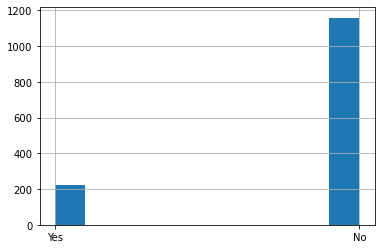

In [17]:
df['Attrition'].hist()

In [18]:
df['Attrition'].value_counts()

No     1158
Yes     221
Name: Attrition, dtype: int64

In [19]:
# Check proportion of 'Yes' values
221 / (1158 + 221)

0.1602610587382161

A large issue is that this data is heavily skewed toward the 'No' value. Only around 16% of the data is 'Yes'. We'll keep this in mind when analyzing the models later on. 

#### Mapping Values

In [20]:
# Attrition - this is our target column - No = 0, Yes = 1
df['Attrition'] = df['Attrition'].map({'No':0,'Yes':1}).astype(int)

# Overtime - No = 0, Yes = 1
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1}).astype(int)

# Gender - Male = 0, Female = 1
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).astype(int)

# Marital Status - Single = 0, Married = 1, Divorced = 2
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,'Married':1, 'Divorced':2}).astype(int)

#### One-hot Encoding

In [21]:
# Business Travel
cols = pd.get_dummies(df['BusinessTravel'], prefix= 'BusTravel')
df[cols.columns] = cols
df.drop('BusinessTravel', axis = 1, inplace = True)

# Department
cols = pd.get_dummies(df['Department'], prefix= 'Dept')
df[cols.columns] = cols
df.drop('Department', axis = 1, inplace = True)

# Education Field
cols = pd.get_dummies(df['EducationField'], prefix= 'EduField')
df[cols.columns] = cols
df.drop('EducationField', axis = 1, inplace = True)

# Job Role
cols = pd.get_dummies(df['JobRole'], prefix= 'JobRole')
df[cols.columns] = cols
df.drop('JobRole', axis = 1, inplace = True)

#### Dropping Columns with No Meaning

Dropping the 'Over18' column as it only contains one value, and will be meaningless in analysis. The 'EmployeeNumber' field will also be dropped as it has no meaning to the models.

In [22]:
df = df.drop(['Over18', 'EmployeeNumber'], axis = 1)

#### Verifying no 'Object' Dtypes are in the dataframe

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1379 non-null   int64  
 1   Attrition                          1379 non-null   int32  
 2   DailyRate                          1379 non-null   float64
 3   DistanceFromHome                   1379 non-null   float64
 4   Education                          1379 non-null   float64
 5   EmployeeCount                      1379 non-null   float64
 6   EnvironmentSatisfaction            1379 non-null   float64
 7   Gender                             1379 non-null   int32  
 8   HourlyRate                         1379 non-null   float64
 9   JobInvolvement                     1379 non-null   float64
 10  JobLevel                           1379 non-null   int64  
 11  JobSatisfaction                    1379 non-null   float

#### Resetting Index

In [24]:
df = df.reset_index(drop = True)
df.head(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EduField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102.0,1.0,2.0,1.0,2.0,1,94.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,49,0,279.0,8.0,1.0,1.0,3.0,0,61.0,2.0,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373.0,2.0,2.0,1.0,4.0,0,92.0,2.0,...,0,0,0,1,0,0,0,0,0,0
3,27,0,591.0,2.0,1.0,1.0,1.0,0,40.0,3.0,...,0,0,0,1,0,0,0,0,0,0
4,32,0,1005.0,2.0,2.0,1.0,4.0,0,79.0,3.0,...,0,0,0,1,0,0,0,0,0,0
5,59,0,1324.0,3.0,3.0,1.0,3.0,1,81.0,4.0,...,0,0,0,1,0,0,0,0,0,0
6,30,0,1358.0,24.0,1.0,1.0,4.0,0,67.0,3.0,...,0,0,0,1,0,0,0,0,0,0
7,38,0,216.0,23.0,3.0,1.0,4.0,0,44.0,2.0,...,0,0,0,0,0,1,0,0,0,0
8,36,0,1299.0,27.0,3.0,1.0,3.0,0,94.0,3.0,...,0,1,0,0,0,0,0,0,0,0
9,35,0,809.0,16.0,3.0,1.0,1.0,0,84.0,4.0,...,0,0,0,1,0,0,0,0,0,0


#### Preparing Variables for Classification

In [25]:
# y = target column 'Attrition', X = dataset without 'Attrition'
X = df.drop(['Attrition'], axis = 1)
y = df['Attrition']

**train_test_split and scale data for Classification**

Will be normalizing the data due to the varied measurements the dataset contains. Using the MinMaxScaler will rescale the data between 0 and 1. A test size of 0.3 was chosen after running the data on various test sizes between 0.15 - 0.3. The test size of 0.3 returned the best results.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, precision_recall_curve, 
                             precision_recall_fscore_support as score)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

print('Size of training set:', X_train.shape[0], '\nSize of testing set:', X_test.shape[0])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Size of training set: 965 
Size of testing set: 414


### <font color=blue>kNN Classification</font>

In [27]:
from sklearn.neighbors import KNeighborsClassifier

#### GridSearch to find best k-value

In [28]:
t = list(range(1,21))

In [29]:
gridKNN = GridSearchCV(KNeighborsClassifier(), 
                      param_grid = {'n_neighbors': t}, return_train_score = True)
gridKNN.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True)

In [30]:
print(gridKNN.best_estimator_)
print(gridKNN.best_params_)

KNeighborsClassifier(n_neighbors=7)
{'n_neighbors': 7}


**Create GridSearch results DataFrame and plot the results**

In [31]:
result = pd.DataFrame(gridKNN.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005347,3.744671e-04,0.013789,0.000371,1,{'n_neighbors': 1},0.740933,0.834197,0.818653,0.787565,...,0.801036,0.033834,20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.005456,3.217587e-04,0.014089,0.000596,2,{'n_neighbors': 2},0.823834,0.844560,0.849741,0.844560,...,0.840415,0.008914,17,0.882124,0.871762,0.876943,0.879534,0.873057,0.876684,0.003877
2,0.005456,5.135693e-07,0.013987,0.000578,3,{'n_neighbors': 3},0.813472,0.844560,0.854922,0.823834,...,0.836269,0.015230,19,0.904145,0.897668,0.902850,0.896373,0.893782,0.898964,0.003929
3,0.005849,5.812747e-04,0.015172,0.000867,4,{'n_neighbors': 4},0.834197,0.849741,0.865285,0.839378,...,0.846632,0.010669,3,0.869171,0.861399,0.860104,0.869171,0.858808,0.863731,0.004517
4,0.005555,1.980545e-04,0.015376,0.002993,5,{'n_neighbors': 5},0.829016,0.844560,0.860104,0.854922,...,0.845596,0.011064,6,0.878238,0.876943,0.865285,0.879534,0.874352,0.874870,0.005090


range(0, 20)


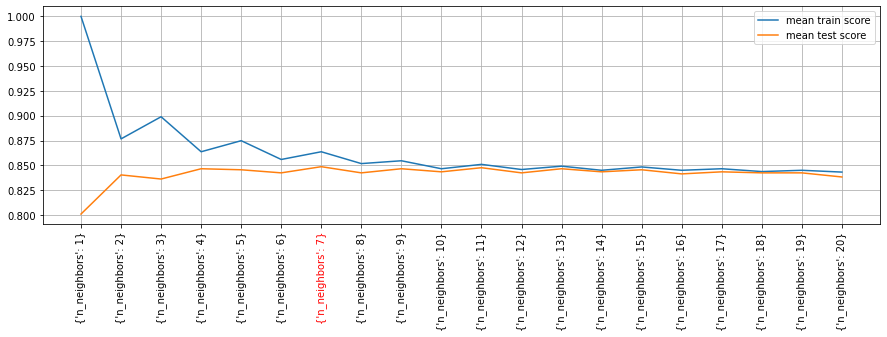

In [32]:
%matplotlib inline

size = range(result['params'].shape[0])
index = gridKNN.best_index_
print(size)

plt.subplots(figsize = (15,4))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.gca().get_xticklabels()[index].set_color('red')
plt.legend()
plt.grid()

**Run kNN model again with k-value of 7 (display Test and Train scores as well as difference)**

In [33]:
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)
print('Train score: ', knn.score(X_train, y_train))
print('Test score: ', knn.score(X_test, y_test))

Train score:  0.8694300518134715
Test score:  0.8454106280193237


In [34]:
print('Difference:', abs(knn.score(X_train, y_train) - knn.score(X_test, y_test)))

Difference: 0.0240194237941479


**Predict the results (for training data)**

In [35]:
y_pred = knn.predict(X_train)

**Classification report (for training data)** 

In [36]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       808
           1       0.88      0.23      0.36       157

    accuracy                           0.87       965
   macro avg       0.87      0.61      0.65       965
weighted avg       0.87      0.87      0.84       965



We can see that this model is not good at predicting '1' values. It is, however, really good at predicting '0' values.

In [37]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict results (for test data)**

In [38]:
y_pred = knn.predict(X_test)

**Classification Report (test data)**

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       350
           1       0.50      0.09      0.16        64

    accuracy                           0.85       414
   macro avg       0.68      0.54      0.54       414
weighted avg       0.80      0.85      0.80       414



This model is not good at predicting '1' values at all. The training classification report showed that it was poor at doing so, however, the test classification report shows that it really struggled in doing this. Based on this alone, this likely will not be a good model to use. 

In [40]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [41]:
confm = confusion_matrix(y_test, y_pred)

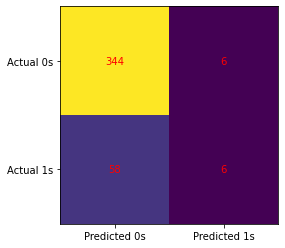

In [42]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

In [43]:
y_test.value_counts()

0    350
1     64
Name: Attrition, dtype: int64

The confusion matrix further shows evidence that the model struggled. It correctly classfified 6 out of 64 '1' values - 58 were incorrectly classified!

**Hold important data for evaluation**

In [44]:
kNNInfo = ['kNN', knn.score(X_train, y_train), knn.score(X_test, y_test), 
           abs(knn.score(X_train, y_train) - knn.score(X_test, y_test)),
           precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, 
           fscoreTest]

### <font color=blue> Logistic Regression </font>

In [45]:
from sklearn.linear_model import LogisticRegression

#### GridSearch for best model parameters

In [46]:
gridLR = GridSearchCV(LogisticRegression(max_iter = 10000, random_state = 0), 
                      param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
                                    'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}, return_train_score = True)
gridLR.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             return_train_score=True)

In [47]:
print(gridLR.best_estimator_)
print(gridLR.best_params_)

LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
{'C': 1, 'solver': 'liblinear'}


**Create GridSearch results DataFrame and plot the results**

In [48]:
result = pd.DataFrame(gridLR.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002778,0.001618,0.000396,1.982451e-04,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,21,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
1,0.006845,0.000371,0.000198,2.429456e-04,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,21,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
2,0.003671,0.000673,0.000298,2.429457e-04,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,21,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
3,0.005158,0.000243,0.000496,2.780415e-07,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,21,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
4,0.006845,0.000371,0.000397,1.984362e-04,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,21,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635


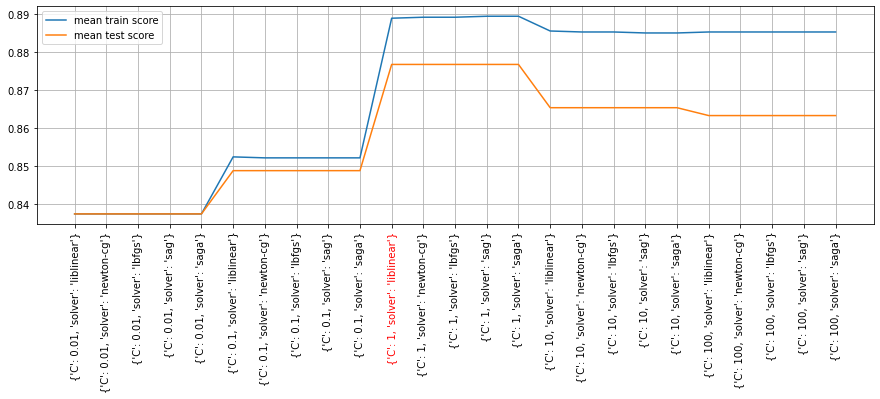

In [49]:
%matplotlib inline

size = range(result['params'].shape[0])
index = gridLR.best_index_

plt.subplots(figsize = (15,4))
plt.plot(size, result['mean_train_score'], label = 'mean train score')
plt.plot(size, result['mean_test_score'], label = 'mean test score')
plt.xticks(size, result['params'], rotation = 90)
plt.gca().get_xticklabels()[index].set_color('red')
plt.legend()
plt.grid()

**Run GridSearch again using 'liblinear' solver to determine penalty**

We will run the GridSearch again based on the first GridSearch returning that the 'liblinear' solver is the best solver to use. The reason we are doing this is because the different solvers in LogisticRegression may not be compatible with certain parameters (such as penalty). This means the GridSearch is unable to search for many paramaters while searching across different solvers. 

In [50]:
gridLR2 = GridSearchCV(LogisticRegression(max_iter = 10000, random_state = 0, solver='liblinear'), 
                       param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
                                    'penalty':['l1', 'l2']}, return_train_score = True)
gridLR2.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=0,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True)

In [51]:
print(gridLR2.best_estimator_)
print(gridLR2.best_params_)

LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
{'C': 1, 'penalty': 'l2'}


**Create GridSearch results DataFrame again and plot the results**

In [52]:
result = pd.DataFrame(gridLR2.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001587,0.000198,0.000397,1.983644e-04,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,9,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
1,0.001885,0.000199,0.000397,3.712712e-04,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,9,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
2,0.002480,0.000314,0.000397,1.984598e-04,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.844560,0.839378,0.849741,...,0.844560,0.004634,8,0.847150,0.843264,0.841969,0.844560,0.843264,0.844041,0.001757
3,0.002182,0.000243,0.000496,1.784161e-07,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.844560,0.849741,0.844560,...,0.848705,0.003877,7,0.857513,0.847150,0.852332,0.853627,0.851036,0.852332,0.003378
4,0.005555,0.001345,0.000496,5.223489e-07,1,l1,"{'C': 1, 'penalty': 'l1'}",0.854922,0.886010,0.865285,...,0.871503,0.011064,2,0.901554,0.887306,0.880829,0.884715,0.880829,0.887047,0.007659


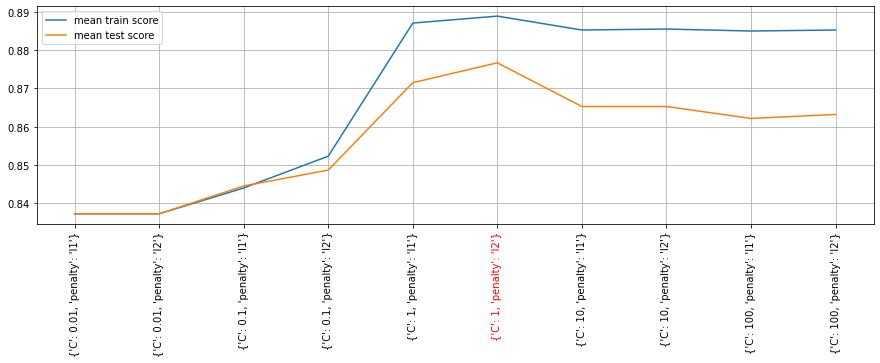

In [53]:
%matplotlib inline

size = range(result['params'].shape[0])
index = gridLR2.best_index_

plt.subplots(figsize = (15,4))
plt.plot(size, result['mean_train_score'], label = 'mean train score')
plt.plot(size, result['mean_test_score'], label = 'mean test score')
plt.xticks(size, result['params'], rotation = 90)
plt.gca().get_xticklabels()[index].set_color('red') # Best parameters highlighted in red
plt.legend()
plt.grid()

**Run the Logistic Regression model using best parameters**

In [54]:
log = LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
log.fit(X_train, y_train)
print('Train score: ', log.score(X_train, y_train))
print('Test score: ', log.score(X_test, y_test))

Train score:  0.8891191709844559
Test score:  0.8768115942028986


In [55]:
print('Difference:', abs(log.score(X_train, y_train) - log.score(X_test, y_test)))

Difference: 0.012307576781557361


**Predict the results (training data)**

In [56]:
y_pred = log.predict(X_train)

**Classification report (training data)** 

In [57]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       808
           1       0.82      0.41      0.54       157

    accuracy                           0.89       965
   macro avg       0.86      0.70      0.74       965
weighted avg       0.88      0.89      0.87       965



The training model seems to do a great job at predicting the '0' values, but struggles at predicting the '1' values (this is expected).

In [58]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [59]:
y_pred = log.predict(X_test)

**Classification Report (test data)**

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       350
           1       0.76      0.30      0.43        64

    accuracy                           0.88       414
   macro avg       0.82      0.64      0.68       414
weighted avg       0.87      0.88      0.85       414



The testing model manages to maintain high accuracy in classifying '0' values, but drops a small amount (compared to the training model) when classifying the '1' values. This may be a decent model. 

In [61]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [62]:
confm = confusion_matrix(y_test, y_pred)

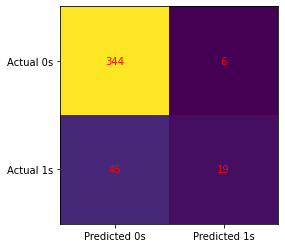

In [63]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [64]:
logInfo = ['LogisticRegression', log.score(X_train, y_train), log.score(X_test, y_test), 
           abs(log.score(X_train, y_train) - log.score(X_test, y_test)),
           precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

**Plot precision and recall curve (test data)**

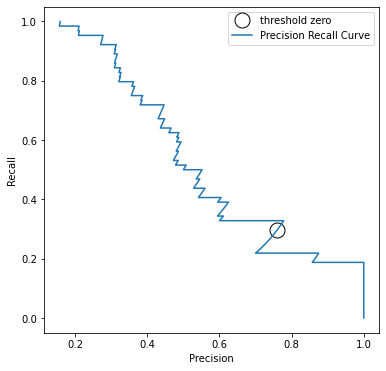

In [65]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, log.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.subplots(figsize=(6, 6))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=15,
         label="threshold zero", fillstyle="none", c='k')

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

Based on the precision recall curce, we can see that this model is either going to have good precision or good recall. The rest of the models should follow this trend considering the target datas is skewed. We will keep this in mind when evaluating the models. 

## <font color=blue> Linear SVC </font>

In [66]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#### GridSearch for best model parameters

In [67]:
gridLSVC = GridSearchCV(LinearSVC(max_iter = 15000, dual = False, random_state = 0),
                    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2']}, 
                    return_train_score = True)
gridLSVC.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(dual=False, max_iter=15000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [68]:
print(gridLSVC.best_estimator_)
print(gridLSVC.best_params_)

LinearSVC(C=0.1, dual=False, max_iter=15000, random_state=0)
{'C': 0.1, 'penalty': 'l2'}


**Create GridSearch results DataFrame and plot the results**

In [69]:
result = pd.DataFrame(gridLSVC.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004861,0.005023,0.003472,0.005952,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,10,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
1,0.003373,0.000729,0.000695,0.000243,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,10,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
2,0.002778,0.000673,0.000595,0.000198,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.839378,0.839378,0.839378,...,0.837306,0.002538,10,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
3,0.003670,0.000397,0.000397,0.000371,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.839378,0.844560,0.839378,...,0.842487,0.002538,9,0.849741,0.841969,0.845855,0.840674,0.841969,0.844041,0.003338
4,0.008928,0.001908,0.000794,0.000243,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.844560,0.854922,0.849741,...,0.852850,0.005284,8,0.862694,0.860104,0.858808,0.863990,0.857513,0.860622,0.002402


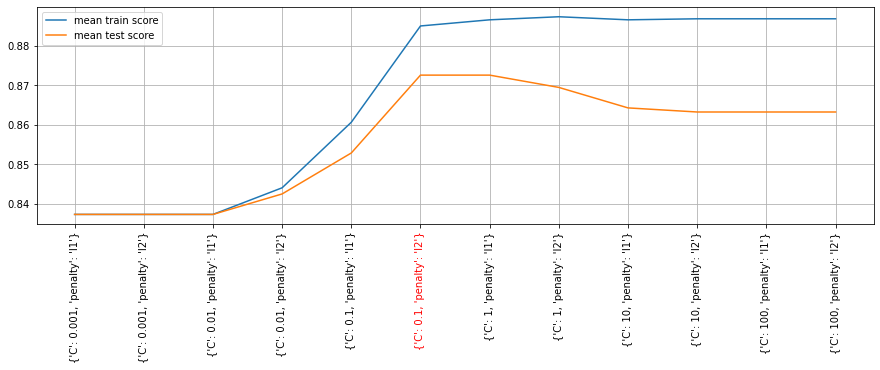

In [70]:
%matplotlib inline

size = range(result['params'].shape[0])
index = gridLSVC.best_index_

plt.subplots(figsize = (15,4))
plt.plot(size, result['mean_train_score'], label = 'mean train score')
plt.plot(size, result['mean_test_score'], label = 'mean test score')
plt.xticks(size, result['params'], rotation = 90)
plt.gca().get_xticklabels()[index].set_color('red')
plt.legend()
plt.grid()

**Run the Linear SVC model using best parameters**

In [71]:
lsvc = LinearSVC(C=0.1, dual=False, max_iter=15000, random_state=0)
lsvc.fit(X_train, y_train)
lsvc.score(X_train, y_train)
print('Train score:', lsvc.score(X_train, y_train))
print('Test score:', lsvc.score(X_test, y_test))

Train score: 0.8829015544041451
Test score: 0.8695652173913043


In [72]:
print('Difference:', abs(lsvc.score(X_train, y_train) - lsvc.score(X_test, y_test)))

Difference: 0.01333633701284076


**Predict the results (training data)**

In [73]:
y_pred = lsvc.predict(X_train)

**Classification Report (training data)** 

In [74]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       808
           1       0.85      0.34      0.48       157

    accuracy                           0.88       965
   macro avg       0.87      0.66      0.71       965
weighted avg       0.88      0.88      0.86       965



Comapred to the previous model's (Logistic Regression) training data results, this model is worse at classifying '1' values.

In [75]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [76]:
y_pred = lsvc.predict(X_test)

**Classification Report (test data)**

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       350
           1       0.75      0.23      0.36        64

    accuracy                           0.87       414
   macro avg       0.81      0.61      0.64       414
weighted avg       0.86      0.87      0.84       414



The training results show that this model struggled at classifying '1' values, but managed to stay just as good as the training set at classifying '0' values. 

In [78]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [79]:
confm = confusion_matrix(y_test, y_pred)

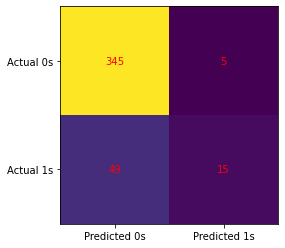

In [80]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [81]:
lsvcInfo = ['LinearSVC', lsvc.score(X_train, y_train), lsvc.score(X_test, y_test), 
           abs(lsvc.score(X_train, y_train) - lsvc.score(X_test, y_test)),
           precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

**Plot precision and recall curve (test data)**

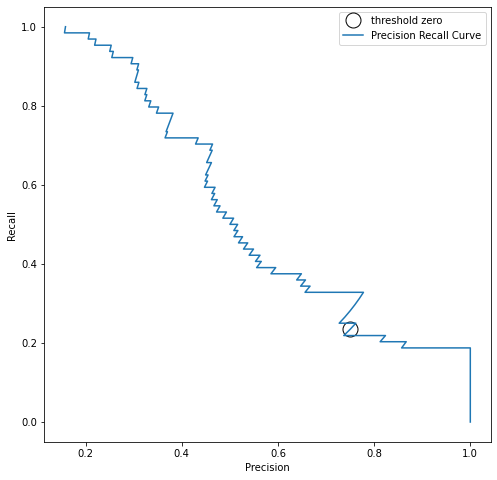

In [82]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, lsvc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.subplots(figsize=(8, 8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=15,
         label="threshold zero", fillstyle="none", c='k')

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

We can see that this model will have a high precision while having lower recall. 

## <font color=blue> Kernelized SVC </font>

In [83]:
from sklearn.svm import SVC

### <font color=purple> Linear </font>

#### GridSearch for best model parameters

In [84]:
gridLinearSVC = GridSearchCV(SVC(kernel = 'linear', random_state = 0),
                            param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}, return_train_score = True)
gridLinearSVC.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [85]:
print(gridLinearSVC.best_estimator_)
print(gridLinearSVC.best_params_)

SVC(C=1, kernel='linear', random_state=0)
{'C': 1}


**Create GridSearch results DataFrame and plot the results**

In [86]:
result = pd.DataFrame(gridLinearSVC.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010019,0.000728,0.002281,0.000243,0.001,{'C': 0.001},0.839378,0.839378,0.839378,0.834197,...,0.837306,0.002538,5,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
1,0.010904,0.000548,0.002285,0.000244,0.01,{'C': 0.01},0.839378,0.839378,0.839378,0.834197,...,0.837306,0.002538,5,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
2,0.012307,0.000842,0.002286,0.000246,0.1,{'C': 0.1},0.844560,0.839378,0.839378,0.839378,...,0.839378,0.003277,4,0.841969,0.838083,0.836788,0.838083,0.839378,0.838860,0.001757
3,0.014586,0.000748,0.001979,0.000010,1,{'C': 1},0.849741,0.870466,0.886010,0.860104,...,0.868394,0.012521,1,0.892487,0.886010,0.887306,0.896373,0.883420,0.889119,0.004678
4,0.044143,0.007285,0.002079,0.000201,10,{'C': 10},0.849741,0.865285,0.886010,0.849741,...,0.866321,0.015159,3,0.897668,0.886010,0.900259,0.900259,0.893782,0.895596,0.005347


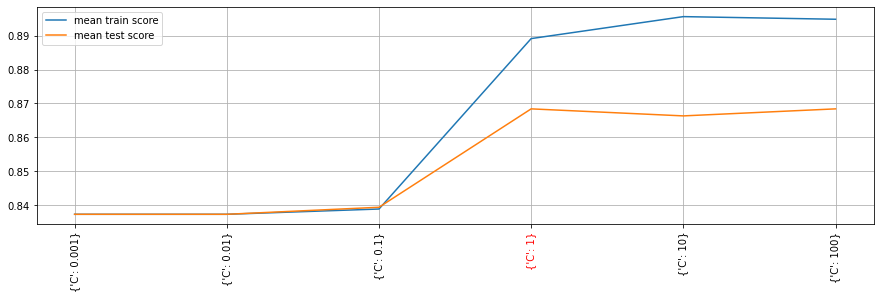

In [87]:
%matplotlib inline

size = range(result['params'].shape[0])
index = gridLinearSVC.best_index_

plt.subplots(figsize = (15,4))
plt.plot(size, result['mean_train_score'], label = 'mean train score')
plt.plot(size, result['mean_test_score'], label = 'mean test score')
plt.xticks(size, result['params'], rotation = 90)
plt.gca().get_xticklabels()[index].set_color('red')
plt.legend()
plt.grid()

**Run the Kernelized Linear SVC model using best parameters**

In [88]:
kernLinear = SVC(C=1, kernel='linear', random_state=0)
kernLinear.fit(X_train, y_train)
print('Test score: ', kernLinear.score(X_train, y_train))
print('Test score: ', kernLinear.score(X_test, y_test))

Test score:  0.8932642487046633
Test score:  0.8695652173913043


In [89]:
print('Difference:', abs(kernLinear.score(X_train, y_train) - kernLinear.score(X_test, y_test)))

Difference: 0.02369903131335893


**Predict the results (training data)**

In [90]:
y_pred = kernLinear.predict(X_train)

**Classification Report (training data)** 

In [91]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       808
           1       0.83      0.43      0.57       157

    accuracy                           0.89       965
   macro avg       0.86      0.71      0.75       965
weighted avg       0.89      0.89      0.88       965



Compared with previous models, this model's training results are decent. It has managed to classify the '1' values just as well as the Logistic Regression model had. 

In [92]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [93]:
y_pred = kernLinear.predict(X_test)

**Classification Report (test data)**

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       350
           1       0.66      0.33      0.44        64

    accuracy                           0.87       414
   macro avg       0.77      0.65      0.68       414
weighted avg       0.85      0.87      0.85       414



Similar to the Logistic Regression model, the test results of this model dropped a small amount when classifying '1' values but is still relatively high considering how skewed the target data is. 

In [95]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [96]:
confm = confusion_matrix(y_test, y_pred)

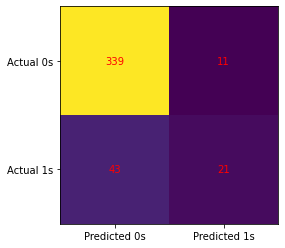

In [97]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [98]:
kernLinearInfo = ['KernLinearSVC', kernLinear.score(X_train, y_train), kernLinear.score(X_test, y_test), 
                   abs(kernLinear.score(X_train, y_train) - kernLinear.score(X_test, y_test)),
                   precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

**Plot precision and recall curve (test data)**

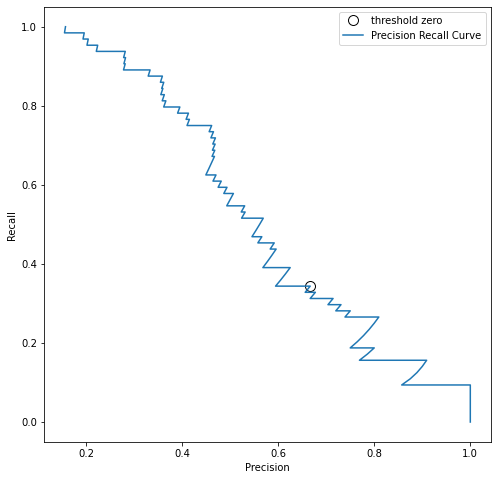

In [99]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, kernLinear.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.subplots(figsize=(8, 8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k')

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

This model's precision recall curve sees a very similar trend to the Linear SVC model's curve. 

### <font color=purple> RBF </font>

#### GridSearch for best model parameters

In [100]:
gridRBFSVC = GridSearchCV(SVC(kernel = 'rbf'),
                          param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma':[0.0001, 0.001, 0.01, 0.1]}, 
                          return_train_score = True)
gridRBFSVC.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True)

In [101]:
print(gridRBFSVC.best_estimator_)
print(gridRBFSVC.best_params_)

SVC(C=100, gamma=0.01)
{'C': 100, 'gamma': 0.01}


**Create GridSearch results DataFrame and plot the results**

In [102]:
result = pd.DataFrame(gridRBFSVC.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011700,0.000238,0.002788,0.000242,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.839378,0.839378,0.839378,...,0.837306,0.002538,6,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
1,0.011611,0.000239,0.002872,0.000208,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.839378,0.839378,0.839378,...,0.837306,0.002538,6,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
2,0.012102,0.000397,0.002678,0.000243,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.839378,0.839378,0.839378,...,0.837306,0.002538,6,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
3,0.013982,0.000379,0.003482,0.000012,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.839378,0.839378,0.839378,...,0.837306,0.002538,6,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
4,0.011403,0.000019,0.002882,0.000189,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.839378,0.839378,0.839378,...,0.837306,0.002538,6,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635


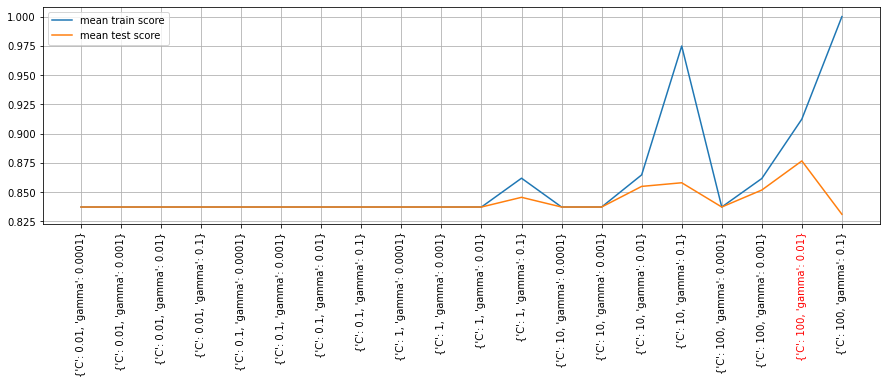

In [103]:
%matplotlib inline

size = range(result['params'].shape[0])
index = gridRBFSVC.best_index_

plt.subplots(figsize = (15,4))
plt.plot(size, result['mean_train_score'], label = 'mean train score')
plt.plot(size, result['mean_test_score'], label = 'mean test score')
plt.xticks(size, result['params'], rotation = 90)
plt.gca().get_xticklabels()[index].set_color('red')
plt.legend()
plt.grid()

**Run the Kernelized RBF SVC model using best parameters**

In [104]:
rbfSVC = SVC(C=100, gamma=0.01)
rbfSVC.fit(X_train, y_train)
print('Train score:', rbfSVC.score(X_train, y_train))
print('Test score:', rbfSVC.score(X_test, y_test))

Train score: 0.910880829015544
Test score: 0.8671497584541062


In [105]:
print('Difference:', abs(rbfSVC.score(X_train, y_train) - rbfSVC.score(X_test, y_test)))

Difference: 0.04373107056143777


**Predict the results (training data)**

In [106]:
y_pred = rbfSVC.predict(X_train)

**Classification Report (training data)** 

In [107]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       808
           1       0.89      0.52      0.65       157

    accuracy                           0.91       965
   macro avg       0.90      0.75      0.80       965
weighted avg       0.91      0.91      0.90       965



Based on the training results for this model, the classification of '1' values is far higher than any other model has been.

In [108]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [109]:
y_pred = rbfSVC.predict(X_test)

**Classification Report (test data)**

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       350
           1       0.64      0.33      0.43        64

    accuracy                           0.87       414
   macro avg       0.76      0.65      0.68       414
weighted avg       0.85      0.87      0.85       414



Compared to the training results, the test results see the classification of '1' values drop off significantly, however, this model may still be competitive with some other models as it is still relatively high. 

In [111]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [112]:
confm = confusion_matrix(y_test, y_pred)

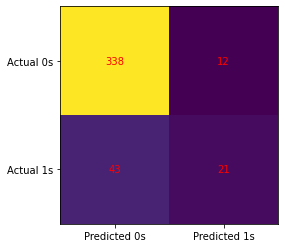

In [113]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [114]:
rbfSVCInfo = ['KernRbfSVC', rbfSVC.score(X_train, y_train), rbfSVC.score(X_test, y_test), 
               abs(rbfSVC.score(X_train, y_train) - rbfSVC.score(X_test, y_test)),
               precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

**Plot precision and recall curve (test data)**

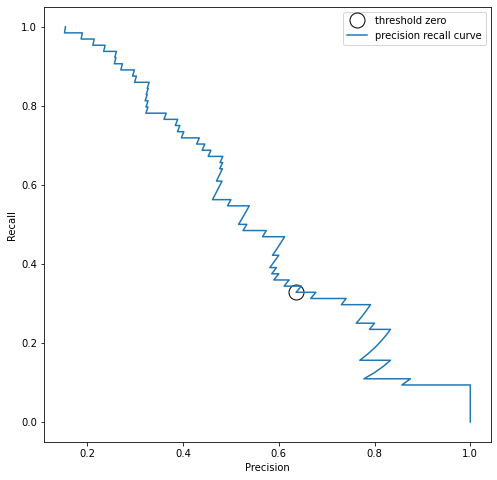

In [115]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, rbfSVC.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.subplots(figsize=(8, 8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=15,
         label="threshold zero", fillstyle="none", c='k')

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

The precision recall curve for this model shows that the precision remains relatively stable around 0.6 when the recall is around 0.3-0.5. This shows a similar trend to previous models. 

### <font color=purple> Poly </font>

#### GridSearch for best model parameters

In [116]:
gridPolySVC = GridSearchCV(SVC(kernel = 'poly'),
                            param_grid = {'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                                          'gamma':[0.0001, 0.001, 0.01, 0.1], 'coef0':[0,1]}, 
                            return_train_score = True)
gridPolySVC.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'coef0': [0, 1],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True)

In [117]:
print(gridPolySVC.best_estimator_)
print(gridPolySVC.best_params_)

SVC(coef0=1, gamma=0.1, kernel='poly')
{'coef0': 1, 'degree': 3, 'gamma': 0.1}


**Create GridSearch results DataFrame and plot the results**

In [118]:
result = pd.DataFrame(gridPolySVC.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_coef0,param_degree,param_gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009027,0.000198,0.002282,0.000243,0,1,0.0001,"{'coef0': 0, 'degree': 1, 'gamma': 0.0001}",0.839378,0.839378,...,0.837306,0.002538,15,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
1,0.010212,0.000250,0.002381,0.000198,0,1,0.001,"{'coef0': 0, 'degree': 1, 'gamma': 0.001}",0.839378,0.839378,...,0.837306,0.002538,15,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
2,0.011110,0.000506,0.002385,0.000201,0,1,0.01,"{'coef0': 0, 'degree': 1, 'gamma': 0.01}",0.839378,0.839378,...,0.837306,0.002538,15,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
3,0.012295,0.000725,0.002377,0.000197,0,1,0.1,"{'coef0': 0, 'degree': 1, 'gamma': 0.1}",0.844560,0.839378,...,0.839378,0.003277,11,0.841969,0.838083,0.836788,0.838083,0.839378,0.838860,0.001757
4,0.008834,0.000201,0.002380,0.000198,0,2,0.0001,"{'coef0': 0, 'degree': 2, 'gamma': 0.0001}",0.839378,0.839378,...,0.837306,0.002538,15,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635


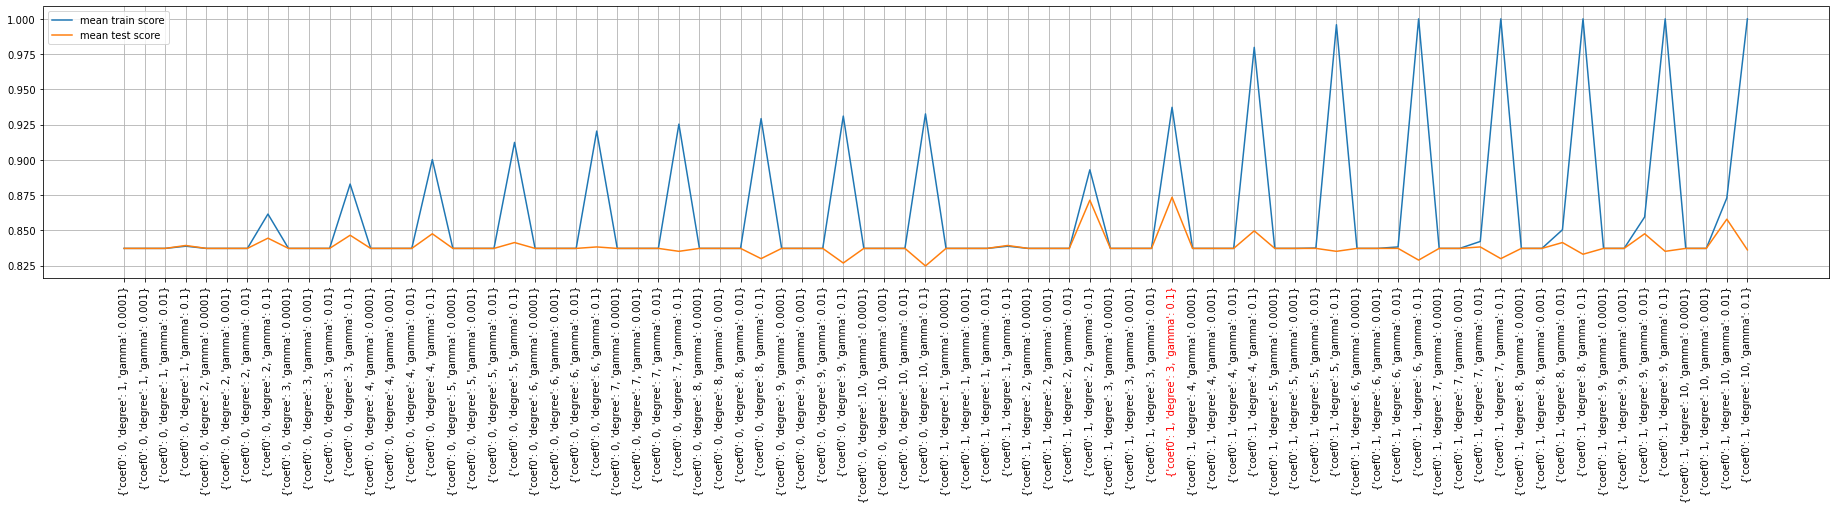

In [119]:
%matplotlib inline

size = range(result['params'].shape[0])
index = gridPolySVC.best_index_

plt.subplots(figsize = (32,5))
plt.plot(size, result['mean_train_score'], label = 'mean train score')
plt.plot(size, result['mean_test_score'], label = 'mean test score')
plt.xticks(size, result['params'], rotation = 90)
plt.gca().get_xticklabels()[index].set_color('red')
plt.legend()
plt.grid()

**Run the Kernelized Poly SVC model using best parameters**

In [120]:
polySVC = SVC(coef0=1, gamma=0.1, kernel='poly')
polySVC.fit(X_train, y_train)
print('Train score:', polySVC.score(X_train, y_train))
print('Test score:', polySVC.score(X_test, y_test))

Train score: 0.9284974093264249
Test score: 0.857487922705314


In [121]:
print('Difference:', abs(polySVC.score(X_train, y_train) - polySVC.score(X_test, y_test)))

Difference: 0.07100948662111084


**Predict the results (training data)**

In [122]:
y_pred = polySVC.predict(X_train)

**Classification Report (training data)** 

In [123]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       808
           1       0.92      0.62      0.74       157

    accuracy                           0.93       965
   macro avg       0.92      0.80      0.85       965
weighted avg       0.93      0.93      0.92       965



The training results for this model show that it is great at classifying '1' values. This is the highest accuracy seen so far (for training results). 

In [124]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [125]:
y_pred = polySVC.predict(X_test)

**Classification Report (test data)**

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       350
           1       0.57      0.31      0.40        64

    accuracy                           0.86       414
   macro avg       0.73      0.63      0.66       414
weighted avg       0.84      0.86      0.84       414



Unfortunately, the test results show that the classification of '1' values drops off drastically compared to previous models. This model may still be competitive against the other models.

In [127]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [128]:
confm = confusion_matrix(y_test, y_pred)

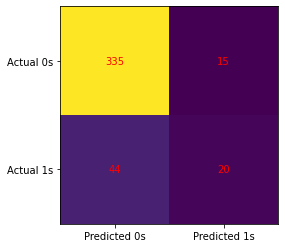

In [129]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [130]:
polySVCInfo = ['KernPolySVC', polySVC.score(X_train, y_train), polySVC.score(X_test, y_test), 
                abs(polySVC.score(X_train, y_train) - polySVC.score(X_test, y_test)),
                precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

**Plot precision and recall curve (test data)**

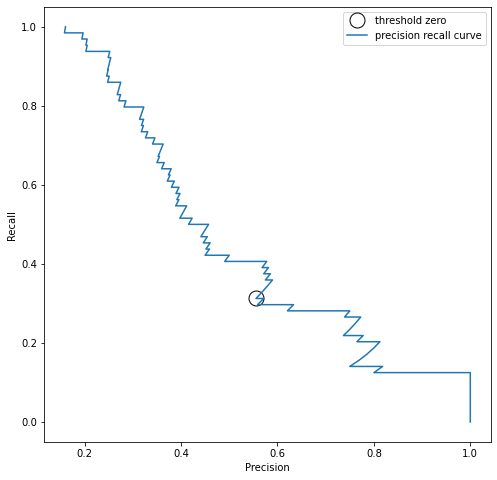

In [131]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, polySVC.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.subplots(figsize=(8, 8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=15,
         label="threshold zero", fillstyle="none", c='k')

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

Compared to other models, the precision recall curve for this models shows that the precision drops off far sooner for lower values of recall. Overall, this does not look good for this model. 

## <font color=blue> Decision Tree </font>

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### GridSearch for best model parameters

In [133]:
gridDtree = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                         param_grid = {'max_depth':[1,2,3,4,5,6,7], 'criterion':['gini', 'entropy'], 
                                       'splitter':['best','random']}, 
                         return_train_score = True)
gridDtree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [134]:
print(gridDtree.best_estimator_)
print(gridDtree.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}


**Create GridSearch results DataFrame and plot the results**

In [135]:
result = pd.DataFrame(gridDtree.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001879,8.556561e-04,0.000199,0.000243,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.839378,0.829016,...,0.832124,0.007755,19,0.836788,0.845855,0.836788,0.848446,0.838083,0.841192,0.004956
1,0.001092,2.002245e-04,0.000198,0.000243,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.839378,0.839378,...,0.837306,0.002538,10,0.836788,0.836788,0.836788,0.838083,0.838083,0.837306,0.000635
2,0.002385,1.907346e-04,0.000194,0.000238,gini,2,best,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.854922,0.839378,...,0.842487,0.023767,4,0.853627,0.856218,0.866580,0.860104,0.845855,0.856477,0.006874
3,0.001291,2.445981e-04,0.000302,0.000247,gini,2,random,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.849741,0.844560,...,0.839378,0.014655,6,0.840674,0.852332,0.849741,0.854922,0.839378,0.847409,0.006261
4,0.002480,2.780415e-07,0.000402,0.000201,gini,3,best,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.865285,0.823834,...,0.827979,0.019220,23,0.862694,0.866580,0.878238,0.862694,0.863990,0.866839,0.005873


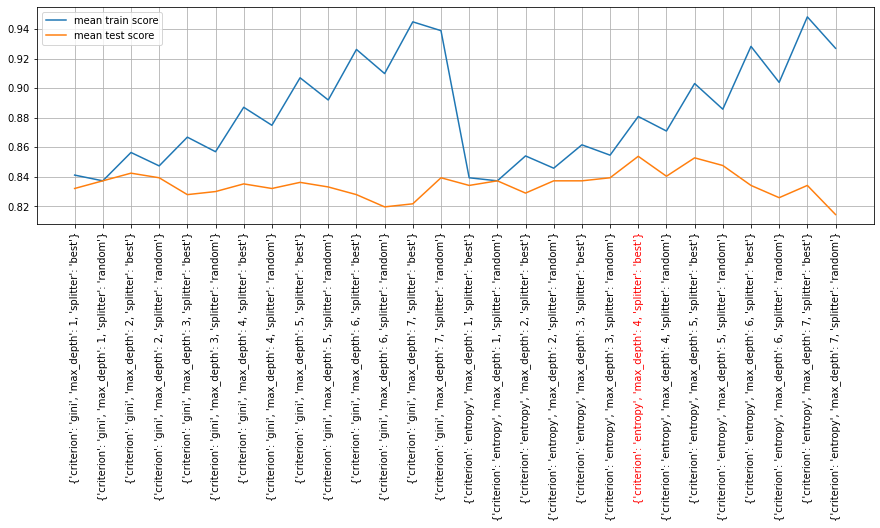

In [136]:
%matplotlib inline

size = range(result['params'].shape[0])
index = gridDtree.best_index_

plt.subplots(figsize = (15,4))
plt.plot(size, result['mean_train_score'], label = 'mean train score')
plt.plot(size, result['mean_test_score'], label = 'mean test score')
plt.xticks(size, result['params'], rotation = 90)
plt.gca().get_xticklabels()[index].set_color('red')
plt.legend()
plt.grid()

**Run the Decision Tree model using best parameters**

In [137]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
dtree.fit(X_train, y_train)
print('Train score:', dtree.score(X_train, y_train))
print('Test score:', dtree.score(X_test, y_test))

Train score: 0.8829015544041451
Test score: 0.8405797101449275


In [138]:
print('Difference:', abs(dtree.score(X_train, y_train) - dtree.score(X_test, y_test)))

Difference: 0.04232184425921759


**Predict the results (training data)**

In [139]:
y_pred = lsvc.predict(X_train)

**Classification Report (training data)** 

In [140]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       808
           1       0.85      0.34      0.48       157

    accuracy                           0.88       965
   macro avg       0.87      0.66      0.71       965
weighted avg       0.88      0.88      0.86       965



The training results for this model show that it is not great at classifying '1' values. It is really good at classifying '0' values. 

In [141]:
precisionTrn, recallTrn, fscoreTrn, supportTrn = score(y_train, y_pred, average = 'macro')

**Predict the results (test data)**

In [142]:
y_pred = dtree.predict(X_test)

**Classification Report (test data)**

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       350
           1       0.47      0.27      0.34        64

    accuracy                           0.84       414
   macro avg       0.67      0.61      0.62       414
weighted avg       0.81      0.84      0.82       414



The test results show that when classifying '1' values, it performs slightly worse than the training results. With these results considered, it's likely this won't be as competitive against some of the other models.

In [144]:
precisionTest, recallTest, fscoreTest, supportTest = score(y_test, y_pred, average = 'macro')

**Confusion Matrix (test data)**

In [145]:
confm = confusion_matrix(y_test, y_pred)

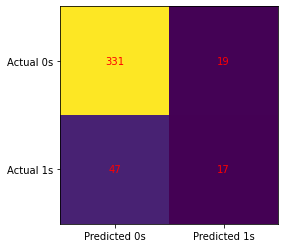

In [146]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

**Hold important data for evaluation**

In [147]:
dtreeInfo = ['DecisionTree', dtree.score(X_train, y_train), dtree.score(X_test, y_test), 
             abs(dtree.score(X_train, y_train) - dtree.score(X_test, y_test)),
             precisionTrn, recallTrn, fscoreTrn, precisionTest, recallTest, fscoreTest]

**Find and plot important features**

In [148]:
dtree.feature_importances_

array([0.12091446, 0.        , 0.        , 0.02274406, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06625887, 0.15866231, 0.        , 0.03376581,
       0.22491467, 0.        , 0.        , 0.        , 0.        ,
       0.03815928, 0.        , 0.        , 0.        , 0.13955738,
       0.        , 0.        , 0.07726122, 0.        , 0.04384473,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02620963, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04770757, 0.        ])

In [149]:
features = sorted(X)
n_features = X.shape[1]

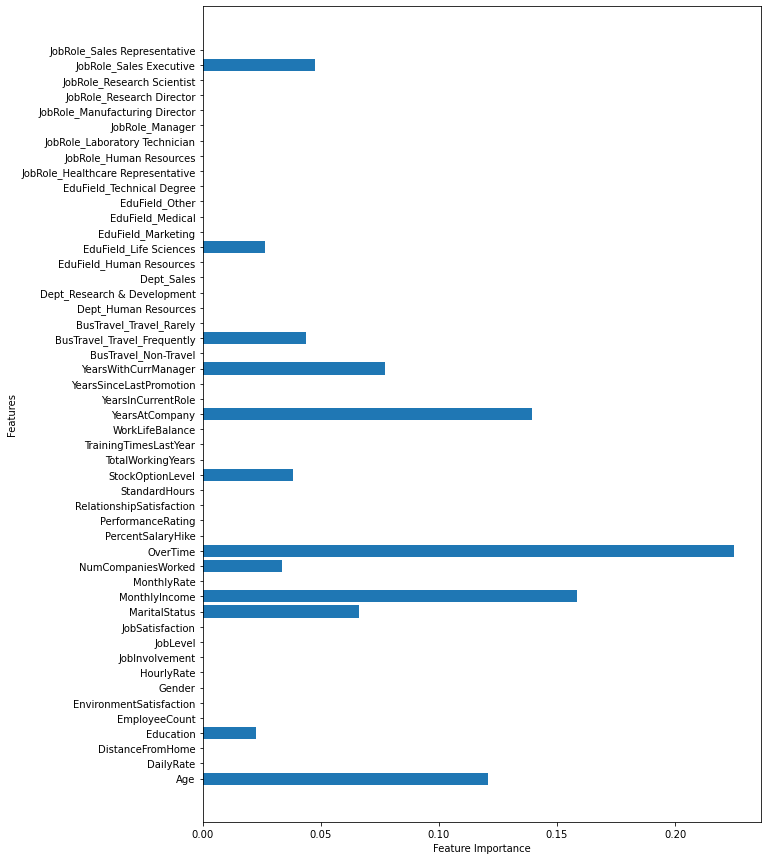

In [150]:
plt.subplots(figsize = (10,15))
plt.barh(range(n_features), dtree.feature_importances_, align='center')
plt.yticks(range(len(dtree.feature_importances_)), X.columns)
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.show()

The outcomes of the Decision Tree models' features make sense when it comes to employee attrition. One would expect that features such as OverTime, MonthlyIncome, Age and YearsAtCompany would impact employee retention. 

## <font color='blue'>Evaluation</font>

**Aggregate the data for every model tested to determine which model to use**

In [151]:
Xvalues = np.array([kNNInfo,
                    logInfo,
                    lsvcInfo,
                    kernLinearInfo,
                    rbfSVCInfo,
                    polySVCInfo,
                    dtreeInfo])

dfValues = pd.DataFrame(Xvalues, columns = ['ModelType', 'TrainScore', 'TestScore', 
                                            'Difference', 'PrecisionTrn', 'RecallTrn', 'f1-scoreTrn', 
                                            'PrecisionTest', 'RecallTest', 'f1-scoreTest'])

In [152]:
dfValues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ModelType      7 non-null      object
 1   TrainScore     7 non-null      object
 2   TestScore      7 non-null      object
 3   Difference     7 non-null      object
 4   PrecisionTrn   7 non-null      object
 5   RecallTrn      7 non-null      object
 6   f1-scoreTrn    7 non-null      object
 7   PrecisionTest  7 non-null      object
 8   RecallTest     7 non-null      object
 9   f1-scoreTest   7 non-null      object
dtypes: object(10)
memory usage: 688.0+ bytes


**Set the data types to float** 

In [153]:
dfValues[['TrainScore', 'TestScore', 
          'Difference', 'PrecisionTrn', 
          'RecallTrn', 'f1-scoreTrn', 
          'PrecisionTest','RecallTest', 
          'f1-scoreTest']] = dfValues[['TrainScore', 'TestScore', 
                                       'Difference', 'PrecisionTrn', 
                                       'RecallTrn', 'f1-scoreTrn', 
                                       'PrecisionTest', 'RecallTest', 
                                       'f1-scoreTest']].astype('float')

**Round the data**

In [154]:
dfValues.round(4)

,ModelType,TrainScore,TestScore,Difference,PrecisionTrn,RecallTrn,f1-scoreTrn,PrecisionTest,RecallTest,f1-scoreTest
0,kNN,0.8694,0.8454,0.0240,0.8735,0.6116,0.6454,0.6779,0.5383,0.5364
1,LogisticRegression,0.8891,0.8768,0.0123,0.8578,0.6952,0.7408,0.8222,0.6399,0.6790
2,LinearSVC,0.8829,0.8696,0.0133,0.8698,0.6632,0.7090,0.8128,0.6100,0.6423
3,KernLinearSVC,0.8933,0.8696,0.0237,0.8642,0.7079,0.7541,0.7718,0.6483,0.6819
4,KernRbfSVC,0.9109,0.8671,0.0437,0.9016,0.7518,0.8010,0.7618,0.6469,0.6789
5,KernPolySVC,0.9285,0.8575,0.0710,0.9226,0.8033,0.8481,0.7277,0.6348,0.6616
6,DecisionTree,0.8829,0.8406,0.0423,0.8698,0.6632,0.7090,0.6739,0.6057,0.6247


#### Analysis of Models (based on the dataframe shown above)

Due the dataset being so skewed, precision, recall and f1-score will be heavily relied on when selecting the model. The accuracy for majority of the models is fine, with Logistic Regression and LinearSVC having the best accuracy difference between the train and test data while the Polynomial Kernel model has one of the worst cases (and is overfitting).

It's interesting to note that the Linear Kernel and Logistic Regression models have the highest f1-score for test data. In regards to the f1-score for training data, the the RBF Kernel and Polynomial Kernel models have the highest scores.

Due to the problem of overfitting the data, we can safely remove the RBF Kernel, Polynomial Kernel and Decision Tree models from our selection of best models. The kNN model also has a poor f1-score in comparison to the other models when considering the testing set, and can safely be removed for the selection. Based off of the precision, recall and f1-scores, we can safely remove LinearSVC as it lacks compared to the LogisticRegression and Linear Kernel models.

#### Model Decision

Based on this knowledge, we'll be picking the Logistic Regression model as the model to predict employee attrition. This decision was based on the f-score, precision, recall and difference. 

While the Linear Kernel model technically has the highest f1-score at 0.6819 (which could be considered the best model accuracy), we would be sacrificing test score accuracy and precision as well as be overfitting the data slightly if we chose that model. By picking the Logistic Regression, however, we can maintain relatively high test and training scores, a far higher precision score (compared to other models), while sacrificing a slight amount of recall (compared to the Kernelized Linear SVC model). 

To add on to this, the difference between the two models' f1-scores (0.6819 for Linear Kernel, 0.6790 for Logistic Regression) is minimal enough to not cause a large difference in model accuracy. With this conclusion, the Logistic Regression model appears to be the best model due to these factors.

### <font color='purple'>Logistic Model (shown again for visibility and further analysis)</font>

We will use the parameters that were determined earlier in the model evaluation phase. 

In [155]:
log = LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
log.fit(X_train, y_train)
print('Train score accuracy: ', log.score(X_train, y_train))
print('Test score accuracy: ', log.score(X_test, y_test))

Train score accuracy:  0.8891191709844559
Test score accuracy:  0.8768115942028986


In [156]:
print('Difference:', abs(log.score(X_train, y_train) - log.score(X_test, y_test)))

Difference: 0.012307576781557361


In [157]:
print(log.intercept_)

[0.61928684]


In [158]:
print(log.coef_)

[[-1.13885801 -0.38865975  0.90450436 -0.13544558  0.         -1.06790796
  -0.13435445  0.08872932 -1.23662678 -0.10373194 -0.88417624 -1.26631818
  -0.01816992  0.24623186  1.3267443   1.66314066 -0.78077052  0.33126107
  -0.45323499  0.         -0.34830393 -0.79949211 -0.62402694 -0.29502518
   0.17898235 -1.02089911  1.86973643 -1.10432821 -0.40156212  0.83761151
   0.18323744  0.09992244  0.05667427  0.46269013  0.29100578 -0.25783596
   0.12143241  0.01967672 -0.18606551  0.6310734  -0.26529258  0.42677357
   0.7611162  -0.34642542 -0.16943002 -0.89758508  0.13154693  0.02834445
   0.95023879]]


**Predict the results (training data)**

In [159]:
y_pred = log.predict(X_train)

**Classification report (training data)** 

In [160]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       808
           1       0.82      0.41      0.54       157

    accuracy                           0.89       965
   macro avg       0.86      0.70      0.74       965
weighted avg       0.88      0.89      0.87       965



**Confusion matrix (training data)**

In [161]:
confm = confusion_matrix(y_train, y_pred)

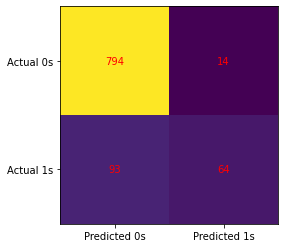

In [162]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

In [163]:
print('Actual values:')
y_train.value_counts()

Actual values:


0    808
1    157
Name: Attrition, dtype: int64

In [164]:
print('Classified ''0'' values:', np.count_nonzero(y_pred == 0))
print('Classified ''1'' values:', np.count_nonzero(y_pred == 1))

Classified 0 values: 887
Classified 1 values: 78


**Predict the results (testing data)**

In [165]:
y_pred = log.predict(X_test)

**Classification report (testing data)**

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       350
           1       0.76      0.30      0.43        64

    accuracy                           0.88       414
   macro avg       0.82      0.64      0.68       414
weighted avg       0.87      0.88      0.85       414



**Confusion matrix (testing data)**

In [167]:
confm = confusion_matrix(y_test, y_pred)

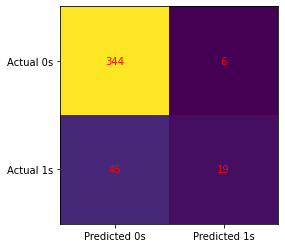

In [168]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(confm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='red')
plt.show()

In [169]:
print('Actual values:')
y_test.value_counts()

Actual values:


0    350
1     64
Name: Attrition, dtype: int64

In [170]:
print('Classified ''0'' values:', np.count_nonzero(y_pred == 0))
print('Classified ''1'' values:', np.count_nonzero(y_pred == 1))

Classified 0 values: 389
Classified 1 values: 25


**Final Thoughts & Analysis on the Logistic Regression Model**

While the Logistic Regression model is technically the best model found from the model evaluation, it is not a great model overall. This is mostly due to the data disparity - only 16% of the data was the 'Yes' / '1' value (shown in the preparation phase). This is backed up by analyzing the classification report for both the train and test sets. We can see that the train set was better at classifying the '1s' than the test set. It's also worth noting however, that the test set did not lose much value in classifying '0s', it managed to keep a high precision and recall (the precision was 0.02 lower than the train set). 

Overall the model is decent. Given that it is a smaller dataset with heavily skewed data, the model is expected to struggle at classifying the data. With a larger dataset or more balanced distribution of the target values, this could potentially be a great model. 